<a href="https://colab.research.google.com/github/drksrao/Movie-correlation-ANALYSIS/blob/main/DWM_LAB_EXP_6A_Movie_correlation_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6 a)	Correlation analysis to determine relation between two defined set of attributes** 

In [ ]:
# Importing the python data science packages that we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/movies1.csv')
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(7668, 15)

In [ ]:
#NOW WILL CHECK THE MISSING VALUES AND WILL TRY TO HANDLE THEM.

In [ ]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
# Here we can see there are many data which is missing  so we will remove the columns with NaN missing values
#because we dont have any source to get them.

In [ ]:
df1=df.dropna()
#df1

In [ ]:
# Replace missing values with 0

"""df['budget'] = df['budget'].fillna(0)

df['gross'] = df['gross'].fillna(0)

df = df.fillna(0)"""

In [ ]:
df1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
df1.shape

(5435, 15)

In [ ]:
df.shape

(7668, 15)

In [ ]:
#Checking duplicates.

df1.drop_duplicates().head()


name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [ ]:
# we can see no duplicates in rows

In [ ]:
# Checking data Types for our columns

print(df1.dtypes)

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
dtype: object


In [ ]:
#Changing the data types for budget and gross to int64

df1['gross'] = df1['gross'].astype('int64', errors='ignore')
df1['budget']= df1['budget'].astype('int64', errors='ignore')
#Following code is to be used if u have raplaced missing values with 0
"""# To change the data type of budget and gross to integer

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')"""


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


"# To change the data type of budget and gross to integer\n\ndf['budget'] = df['budget'].astype('int64')\n\ndf['gross'] = df['gross'].astype('int64')"

In [ ]:
df1.dtypes

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime     float64
dtype: object

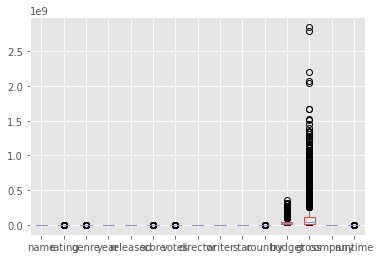

In [ ]:
# Checking for outliers if any

df1.boxplot()

In [ ]:
# Sorting to see pattern if any in Gross column

df1.sort_values(by=['gross'], inplace=False, ascending=False).head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [ ]:
# Correlation Analysis

# Hypothesis 1: There is a high correlation between Movie Budget and Gross earnings
# Hypothesis 2: There is a high correlation between Production Company and Gross earnings

In [ ]:
# Will check the correlation between movie parameters.

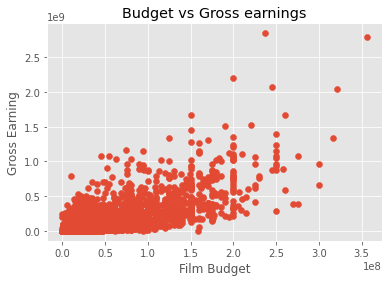

In [ ]:
#PLotting a Scatterplot using matplotlib between  gross and budget.

plt.scatter(x=df1['budget'],y=df1['gross'])
plt.title("Budget vs Gross earnings")
plt.xlabel('Film Budget')
plt.ylabel('Gross Earning')
plt.show()

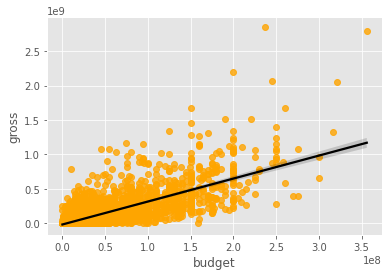

In [ ]:
#Regression plot using seaborn for seeing the regression is +ve or -ve. to check correlated.

sns.regplot(x="budget",y="gross",data=df1, scatter_kws={"color":"orange"}, line_kws={"color":"black"})


In [ ]:
#Using pearson correlation.
df1.corr(method ='pearson')

name    rating     genre      year  released     score  \
name      1.000000 -0.020451  0.012411  0.024335 -0.006231  0.015074   
rating   -0.020451  1.000000  0.128329  0.019502  0.020630  0.061090   
genre     0.012411  0.128329  1.000000 -0.071001  0.023383  0.021769   
year      0.024335  0.019502 -0.071001  1.000000 -0.000845  0.055391   
released -0.006231  0.020630  0.023383 -0.000845  1.000000  0.046028   
score     0.015074  0.061090  0.021769  0.055391  0.046028  1.000000   
votes     0.012639  0.007375 -0.129370  0.205852  0.027477  0.473789   
director  0.013984  0.015042 -0.009665 -0.037164  0.003400  0.005610   
writer    0.011479 -0.006661  0.016123 -0.024674  0.009046  0.013075   
star     -0.007061  0.001929  0.001004 -0.033242  0.015265  0.009205   
country  -0.024731  0.018929 -0.009611 -0.066074 -0.017365 -0.046735   
budget    0.023620 -0.187345 -0.356105  0.327793  0.017472  0.071821   
gross     0.005721 -0.167764 -0.234013  0.274354  0.006297  0.222100   
company   0.020958 -0.083688 -0.069008 -0.013061 -0.004300  0.020513   
runtime   0.010747  0.127415 -0.066917  0.074203  0.008596  0.414580   

             votes  director    writer      star   country    budget  \
name      0.012639  0.013984  0.011479 -0.007061 -0.024731  0.023620   
rating    0.007375  0.015042 -0.006661  0.001929  0.018929 -0.187345   
genre    -0.129370 -0.009665  0.016123  0.001004 -0.009611 -0.356105   
year      0.205852 -0.037164 -0.024674 -0.033242 -0.066074  0.327793   
released  0.027477  0.003400  0.009046  0.015265 -0.017365  0.017472   
score     0.473789  0.005610  0.013075  0.009205 -0.046735  0.071821   
votes     1.000000 -0.009980 -0.005213 -0.016938  0.041253  0.440035   
director -0.009980  1.000000  0.262657  0.035896  0.009546 -0.009506   
writer   -0.005213  0.262657  1.000000  0.019275  0.022596 -0.039186   
star     -0.016938  0.035896  0.019275  1.000000 -0.009827 -0.020605   
country   0.041253  0.009546  0.022596 -0.009827  1.000000  0.054561   
budget    0.440035 -0.009506 -0.039186 -0.020605  0.054561  1.000000   
gross     0.614895 -0.029383 -0.035748  0.000408  0.060624  0.740410   
company   0.119155 -0.007332 -0.002907  0.014546  0.050418  0.170508   
runtime   0.352437  0.017907 -0.016848  0.012309 -0.035681  0.318595   

             gross   company   runtime  
name      0.005721  0.020958  0.010747  
rating   -0.167764 -0.083688  0.127415  
genre    -0.234013 -0.069008 -0.066917  
year      0.274354 -0.013061  0.074203  
released  0.006297 -0.004300  0.008596  
score     0.222100  0.020513  0.414580  
votes     0.614895  0.119155  0.352437  
director -0.029383 -0.007332  0.017907  
writer   -0.035748 -0.002907 -0.016848  
star      0.000408  0.014546  0.012309  
country   0.060624  0.050418 -0.035681  
budget    0.740410  0.170508  0.318595  
gross     1.000000  0.149620  0.275596  
company   0.149620  1.000000  0.038408  
runtime   0.275596  0.038408  1.000000

# We can see the highest correlation numberis 0.740247 i.e, between gross and **budget**

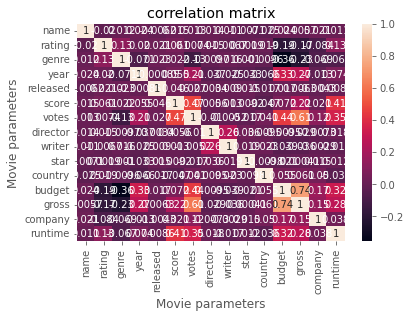

In [ ]:
correlation_matrix = df1.corr(method ='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matrix")
plt.xlabel("Movie parameters")
plt.ylabel("Movie parameters")

plt.show()

In [ ]:
# now will assign a number to non numeric parameter for visualize the correlation within all data.

In [ ]:
numerized_df = df1 

for col in numerized_df.columns:
    if(numerized_df[col].dtype == "object"):
        numerized_df[col]= numerized_df[col].astype("category")
        numerized_df[col]=numerized_df[col].cat.codes
        
numerized_df
    

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
48    6360       4      0  1980      2502    5.1     3100.0       509    2893   
50    5149       4      4  1980      3296    7.3    22000.0      2913    4495   
51    3556       6      4  1980      3211    6.8     4500.0      1470     454   
53     971       4      0  1980      1686    6.1    11000.0       507    1080   
56    7298       4      0  1980      2116    4.6     2600.0      1167    1519   
57    4015       4      4  1980      1396    5.4     2400.0      1333    3702   
58    6368       6      0  1980       342    5.1     5200.0       812    2568   
75    6149       1      1  1980      1816    5.8     1300.0       415    1312   
77    7373       6      4  1980       342    5.9      415.0      2144    1888   
80    4239       6      6  1980      3402    4.0      546.0      1406    1432   
92    2768       4      0  1981      1696    8.4   905000.0      2660    2550   
94     400       6      4  1981       413    7.5    97000.0      1412    2157   
95    1821       6      0  1981      1385    7.2   131000.0      1374    2104   
96    5806       2     10  1981        62    7.5   192000.0      2480    3823   
97    4317       6      4  1981      2031    6.2    40000.0       282     461   
98     841       6      5  1981      1532    7.4    47000.0       318     520   
99    1207       4      0  1981      1696    6.9    42000.0       712     418   
100   1860       6      1  1981        16    7.4    59000.0      1367    4197   
101   3402       6      0  1981      

<function matplotlib.pyplot.show>

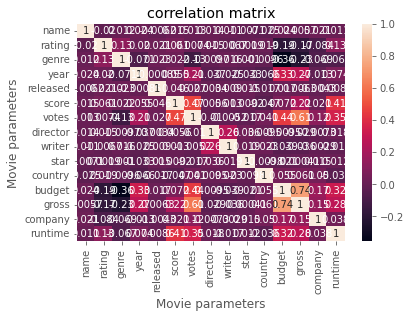

In [ ]:
correlation_matrix = df1.corr(method ='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matrix")
plt.xlabel("Movie parameters")
plt.ylabel("Movie parameters")
plt.show

In [ ]:
numerized_df.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.020451  0.012411  0.024335 -0.006231  0.015074   
rating   -0.020451  1.000000  0.128329  0.019502  0.020630  0.061090   
genre     0.012411  0.128329  1.000000 -0.071001  0.023383  0.021769   
year      0.024335  0.019502 -0.071001  1.000000 -0.000845  0.055391   
released -0.006231  0.020630  0.023383 -0.000845  1.000000  0.046028   
score     0.015074  0.061090  0.021769  0.055391  0.046028  1.000000   
votes     0.012639  0.007375 -0.129370  0.205852  0.027477  0.473789   
director  0.013984  0.015042 -0.009665 -0.037164  0.003400  0.005610   
writer    0.011479 -0.006661  0.016123 -0.024674  0.009046  0.013075   
star     -0.007061  0.001929  0.001004 -0.033242  0.015265  0.009205   
country  -0.024731  0.018929 -0.009611 -0.066074 -0.017365 -0.046735   
budget    0.023620 -0.187345 -0.356105  0.327793  0.017472  0.071821   
gross     0.005721 -0.167764 -0.234013  0.274354  0.006297  0.222100   
company   0.020958 -0.083688 -0.069008 -0.013061 -0.004300  0.020513   
runtime   0.010747  0.127415 -0.066917  0.074203  0.008596  0.414580   

             votes  director    writer      star   country    budget  \
name      0.012639  0.013984  0.011479 -0.007061 -0.024731  0.023620   
rating    0.007375  0.015042 -0.006661  0.001929  0.018929 -0.187345   
genre    -0.129370 -0.009665  0.016123  0.001004 -0.009611 -0.356105   
year      0.205852 -0.037164 -0.024674 -0.033242 -0.066074  0.327793   
released  0.027477  0.003400  0.009046  0.015265 -0.017365  0.017472   
score     0.473789  0.005610  0.013075  0.009205 -0.046735  0.071821   
votes     1.000000 -0.009980 -0.005213 -0.016938  0.041253  0.440035   
director -0.009980  1.000000  0.262657  0.035896  0.009546 -0.009506   
writer   -0.005213  0.262657  1.000000  0.019275  0.022596 -0.039186   
star     -0.016938  0.035896  0.019275  1.000000 -0.009827 -0.020605   
country   0.041253  0.009546  0.022596 -0.009827  1.000000  0.054561   
budget    0.440035 -0.009506 -0.039186 -0.020605  0.054561  1.000000   
gross     0.614895 -0.029383 -0.035748  0.000408  0.060624  0.740410   
company   0.119155 -0.007332 -0.002907  0.014546  0.050418  0.170508   
runtime   0.352437  0.017907 -0.016848  0.012309 -0.035681  0.318595   

             gross   company   runtime  
name      0.005721  0.020958  0.010747  
rating   -0.167764 -0.083688  0.127415  
genre    -0.234013 -0.069008 -0.066917  
year      0.274354 -0.013061  0.074203  
released  0.006297 -0.004300  0.008596  
score     0.222100  0.020513  0.414580  
votes     0.614895  0.119155  0.352437  
director -0.029383 -0.007332  0.017907  
writer   -0.035748 -0.002907 -0.016848  
star      0.000408  0.014546  0.012309  
country   0.060624  0.050418 -0.035681  
budget    0.740410  0.170508  0.318595  
gross     1.000000  0.149620  0.275596  
company   0.149620  1.000000  0.038408  
runtime   0.275596  0.038408  1.000000

In [ ]:
correlation_matrix = numerized_df.corr()

correlation_pairs =correlation_matrix.unstack()

correlation_pairs



name      name        1.000000
          rating     -0.020451
          genre       0.012411
          year        0.024335
          released   -0.006231
          score       0.015074
          votes       0.012639
          director    0.013984
          writer      0.011479
          star       -0.007061
          country    -0.024731
          budget      0.023620
          gross       0.005721
          company     0.020958
          runtime     0.010747
rating    name       -0.020451
          rating      1.000000
          genre       0.128329
          year        0.019502
          released    0.020630
          score       0.061090
          votes       0.007375
          director    0.015042
          writer     -0.006661
          star        0.001929
          country     0.018929
          budget     -0.187345
          gross      -0.167764
          company    -0.083688
          runtime     0.127415
genre     name        0.012411
          rating      0.128329
        

In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
sorted_pair = correlation_pairs.sort_values()
sorted_pair

budget    genre      -0.356105
genre     budget     -0.356105
gross     genre      -0.234013
genre     gross      -0.234013
rating    budget     -0.187345
budget    rating     -0.187345
gross     rating     -0.167764
rating    gross      -0.167764
votes     genre      -0.129370
genre     votes      -0.129370
rating    company    -0.083688
company   rating     -0.083688
year      genre      -0.071001
genre     year       -0.071001
company   genre      -0.069008
genre     company    -0.069008
          runtime    -0.066917
runtime   genre      -0.066917
country   year       -0.066074
year      country    -0.066074
country   score      -0.046735
score     country    -0.046735
writer    budget     -0.039186
budget    writer     -0.039186
year      director   -0.037164
director  year       -0.037164
writer    gross      -0.035748
gross     writer     -0.035748
runtime   country    -0.035681
country   runtime    -0.035681
star      year       -0.033242
year      star       -0.033242
director

In [ ]:
high_correlations = sorted_pair[(sorted_pair)>0.5]

high_correlations

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and gross have highest coorelations in the whole dataset.